In [1]:
import pandas as pd 
import numpy as np
from scipy import stats

In [14]:
data=pd.read_csv(r'C:\Users\buzga\Desktop\School\grad_school\spring_2023\prob_stats_2\homework\homework_5\ANSUR II MALE Public.csv')
data.head()
data=data[["footlength", "stature"]]
data=data.values
data
#.values
#print(data.values[:, 0])
data.shape

(4082, 2)

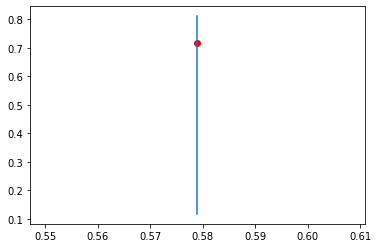

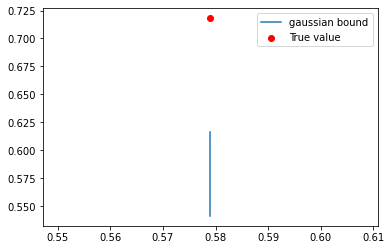

In [58]:
import matplotlib.pyplot as plt
#def generate_bootstrap_samples(n, sample):
def sample_data(n):
    np.random.shuffle(data)
    return data[0:n]
def generate_bootstrap_samples(sample, number,rng):
    return rng.choice(sample, size=(number,len(sample)), replace=True)
def bootstrap_sample_corelations(bootsraps):
    return np.array([np.corrcoef(bootsraps[i][:,0], bootsraps[i][:,1])[0][1] for i in range(len(bootsraps))])

def get_gaussina_bootstrap_ci(alpha,sample, boot_cors):
    se=np.std(boot_cors)/np.sqrt(len(boot_cors))
    c_alpha=stats.norm.ppf(1-(alpha)/2)
    mean=np.corrcoef(sample[:,0],sample[:,1])[0][1]
    return (mean-se*c_alpha, mean+se*c_alpha)

def get_percentile_bootsrrap_ci(alpha, boot_cors):
    lower=np.percentile(boot_cors, ((alpha)*50))
    upper=np.percentile(boot_cors,(100- ((alpha)*50)))  
    return [lower, upper]
def unmodfied_gaursian_ci(alpha, sample):
    se=np.std(sample)
    print(se)
    c_alpha=stats.norm.ppf(1-(alpha)/2)
    mean=np.corrcoef(sample[:,0],sample[:,1])[0][1]
    return (mean-se*c_alpha, mean+se*c_alpha)


def generate_many_gaussian(sample, num_bootstraps, num_epochs,alpha):
    bounds=[]
    contains_population=[]
    rng=np.random.default_rng()
    population_cor=np.corrcoef(data[:,0],data[:,1])[0][1]
    for i in range(num_epochs):
        boot_straps=generate_bootstrap_samples(sample, num_bootstraps,rng)
        boot_cors=bootstrap_sample_corelations(boot_straps)
        a=get_gaussina_bootstrap_ci(alpha,sample, boot_cors)
        bounds.append(a)   
        contains_population.append(((a[0]<=population_cor)and (a[1]>=population_cor)))
    contains_population=np.array(contains_population)
    a=np.sum(contains_population)/len(contains_population)
    print(a) 
    return np.array(bounds)
def generate_many_percente(sample, num_bootstraps, num_epochs,alpha):
    bounds=[]
    print(len(sample))
    rng=np.random.default_rng()
    contains_population=[]
    population_cor=np.corrcoef(data[:,0],data[:,1])[0][1]
    for i in range(num_epochs):
        boot_straps=generate_bootstrap_samples(sample, num_bootstraps,rng)
        boot_cors=bootstrap_sample_corelations(boot_straps)
        a=get_percentile_bootsrrap_ci(alpha, boot_cors)
        bounds.append(a)   
        contains_population.append(((a[0]<=population_cor)and (a[1]>=population_cor)))
    contains_population=np.array(contains_population)
    a=np.sum(contains_population)/len(contains_population)
    print(a) 
    return bounds


sample=sample_data(25)
rng=np.random.default_rng()
b=generate_bootstrap_samples(sample, 100,rng)
boot_cors=bootstrap_sample_corelations(b)
alpha=.05
percentile_bound=get_percentile_bootsrrap_ci(alpha, boot_cors)
gausian_bounds=get_gaussina_bootstrap_ci(alpha,sample, boot_cors)

x_1 = np.arange(1, 2)
x_2 = x_1 + 0.1
x=[np.corrcoef(sample[:,0],sample[:,1])[0][1],np.corrcoef(sample[:,0],sample[:,1])[0][1]]
plt.plot(x,percentile_bound, label="percentile bound")
plt.scatter(np.corrcoef(sample[:,0],sample[:,1])[0][1],np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
plt.show()

plt.plot(x,gausian_bounds, label="gaussian bound")
plt.scatter(np.corrcoef(sample[:,0],sample[:,1])[0][1],np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
plt.legend()


# plt.errorbar(x=x_1, y=y_1, yerr=bound, color="black", capsize=3,
#              linestyle="None",
#              marker="s", markersize=7, mfc="black", mec="black")

0.0


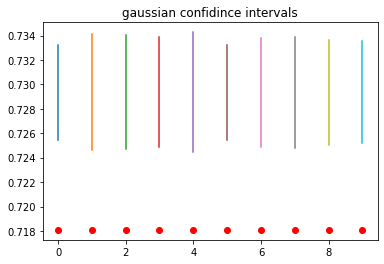

1000
1.0


Text(0.5, 1.0, 'boostrap confidince intervals')

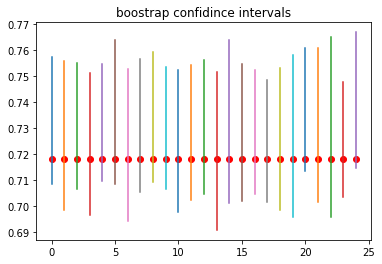

In [101]:
sample=sample_data(1000)
alpha=.05
a=generate_many_gaussian(sample, 50, 100,alpha)

x=range(10)
for i in x:
    plt.plot([x[i], x[i]], a[i] )
    plt.scatter([x[i]], np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
plt.title("gaussian confidince intervals")
plt.show()

sample=sample_data(1000)
alpha=.05
a=generate_many_percente(sample, 50, 100,alpha)
x=range(25)
for i in x:
    plt.plot([x[i], x[i]], a[i] )
    plt.scatter([x[i]], np.corrcoef(data[:,0],data[:,1])[0][1], label="True value", c="r")
plt.title("boostrap confidince intervals")

In [103]:
data=pd.read_csv(r'C:\Users\buzga\Desktop\School\grad_school\spring_2023\prob_stats_2\homework\homework_5\ANSUR II MALE Public.csv')
data.head()
data=data[["stature"]]
data=data.values
data
#.values
#print(data.values[:, 0])
data.shape

(4082, 1)

0.0


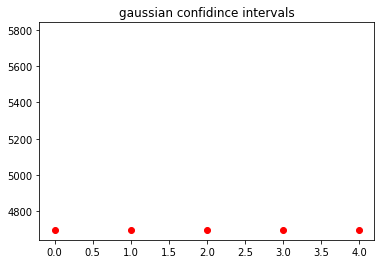

100
0.0
[[4383.48548016, 4383.48548016], [4411.5140817599995, 4411.5140817599995], [4334.11301184, 4334.11301184], [4536.398863840001, 4536.398863840001], [4535.4647377599995, 4535.4647377599995]]


Text(0.5, 1.0, 'boostrap confidince intervals')

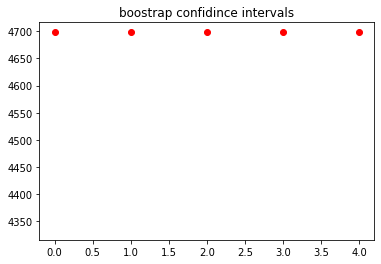

In [109]:
import matplotlib.pyplot as plt
#def generate_bootstrap_samples(n, sample):
def sample_data(n):
    np.random.shuffle(data)
    return data[0:n]
def generate_bootstrap_samples(sample, number,rng):
    return rng.choice(sample, size=(number,len(sample)), replace=True)
def bootstrap_sample_varinace(bootsraps):
    return np.array( [np.var(bootsraps)  for i in range(len(bootsraps))])

def get_gaussina_bootstrap_ci(alpha,sample, boot_cors):
    se=np.std(boot_cors)/np.sqrt(len(boot_cors))
    c_alpha=stats.norm.ppf(1-(alpha)/2)
    mean=np.var(sample)
    return (mean-se*c_alpha, mean+se*c_alpha)

def get_percentile_bootsrrap_ci(alpha, boot_cors):
    lower=np.percentile(boot_cors, ((alpha)*50))
    upper=np.percentile(boot_cors,(100- ((alpha)*50)))  
    return [lower, upper]
def unmodfied_gaursian_ci(alpha, sample):
    se=np.std(sample)
    print(se)
    c_alpha=stats.norm.ppf(1-(alpha)/2)
    mean=np.var(sample)
    return (mean-se*c_alpha, mean+se*c_alpha)


def generate_many_gaussian(sample, num_bootstraps, num_epochs,alpha):
    bounds=[]
    contains_population=[]
    rng=np.random.default_rng()
    population_cor=np.var(data)
    for i in range(num_epochs):
        boot_straps=generate_bootstrap_samples(sample, num_bootstraps,rng)
        boot_cors=bootstrap_sample_varinace(boot_straps)
        a=get_gaussina_bootstrap_ci(alpha,sample, boot_cors)
        bounds.append(a)   
        contains_population.append(((a[0]<=population_cor)and (a[1]>=population_cor)))
    contains_population=np.array(contains_population)
    a=np.sum(contains_population)/len(contains_population)
    print(a) 
    return np.array(bounds)
def generate_many_percente(sample, num_bootstraps, num_epochs,alpha):
    bounds=[]
    print(len(sample))
    rng=np.random.default_rng()
    contains_population=[]
    population_cor=np.var(data)
    for i in range(num_epochs):
        boot_straps=generate_bootstrap_samples(sample, num_bootstraps,rng)
        boot_cors=bootstrap_sample_varinace(boot_straps)
        a=get_percentile_bootsrrap_ci(alpha, boot_cors)
        bounds.append(a)   
        contains_population.append(((a[0]<=population_cor)and (a[1]>=population_cor)))
    contains_population=np.array(contains_population)
    a=np.sum(contains_population)/len(contains_population)
    print(a) 
    return bounds

sample=sample_data(100)
alpha=.05
a=generate_many_gaussian(sample, 25, 5,alpha)
#print(a)
x=range(5)
for i in x:
    plt.plot([x[i], x[i]], a[i] )
    plt.scatter([x[i]], np.var(data), label="True value", c="r")
plt.title("gaussian confidince intervals")
plt.show()

sample=sample_data(100)
alpha=.05
a=generate_many_percente(sample, 25, 5,alpha)
x=range(5)
print(a)
for i in x:
    plt.plot([x[i], x[i]], a[i] )
    plt.scatter([x[i]], np.var(data), label="True value", c="r")
plt.title("boostrap confidince intervals")